In [45]:
import pandas as pd

df = pd.read_csv("Students Performance Dataset.csv")

print("First 5 rows of the dataset:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nColumn information:")
print(df.info())

First 5 rows of the dataset:
| Student_ID   | First_Name   | Last_Name   | Email                   | Gender   | Age   | Department   | Attendance (%)   | Midterm_Score   | Final_Score   | Assignments_Avg   | Quizzes_Avg   | Participation_Score   | Projects_Score   | Total_Score   | Grade   | Study_Hours_per_Week   | Extracurricular_Activities   | Internet_Access_at_Home   | Parent_Education_Level   | Family_Income_Level   | Stress_Level (1-10)   | Sleep_Hours_per_Night   |
|:-------------|:-------------|:------------|:------------------------|:---------|:------|:-------------|:-----------------|:----------------|:--------------|:------------------|:--------------|:----------------------|:-----------------|:--------------|:--------|:-----------------------|:-----------------------------|:--------------------------|:-------------------------|:----------------------|:----------------------|:------------------------|
| S1000        | Omar         | Williams    | student0@university.com | F

In [46]:

import numpy as np
columns_to_drop = ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Total_Score']
df_processed = df.drop(columns=columns_to_drop, axis=1)

parent_map = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_processed['Parent_Education_Level'] = df_processed['Parent_Education_Level'].map(parent_map)
df_processed['Family_Income_Level'] = df_processed['Family_Income_Level'].map(income_map)



In [47]:
df_processed

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,F,10.3,Yes,No,2.0,1,1,5.9
1,Male,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,B,27.1,No,No,0.0,0,4,4.3
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,D,12.4,Yes,No,0.0,0,9,6.1
3,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,F,25.5,No,Yes,0.0,0,8,4.9
4,Female,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,C,13.3,Yes,No,2.0,1,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,CS,96.09,45.86,45.63,74.13,81.53,9.8,51.66,F,7.8,No,No,2.0,1,10,4.5
4996,Male,19,Mathematics,96.30,78.67,47.42,57.89,85.96,47.8,52.33,F,24.2,No,Yes,NaN,1,4,7.2
4997,Female,24,CS,89.94,50.84,65.83,84.69,82.27,7.5,97.89,C,7.6,No,Yes,NaN,2,5,6.6
4998,Male,23,Engineering,99.09,55.44,57.45,78.78,55.96,62.9,84.74,D,14.5,Yes,No,3.0,1,10,5.9


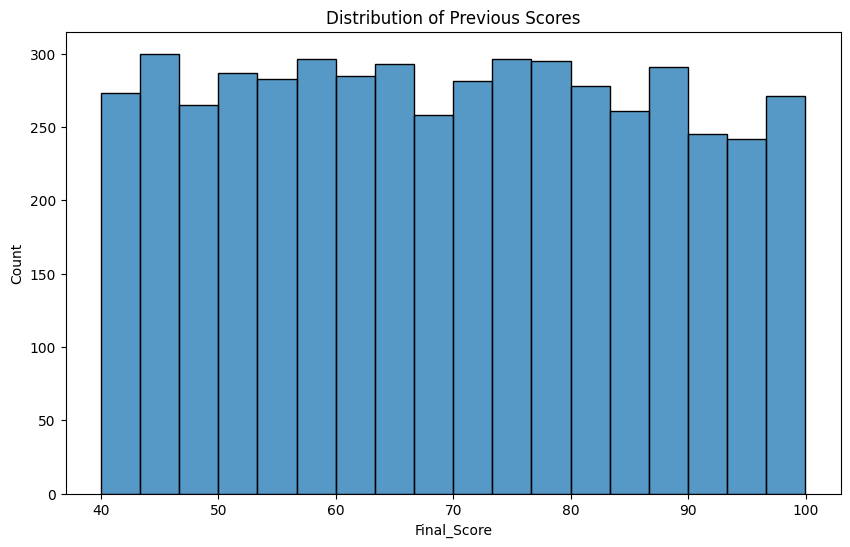

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(x='Final_Score',data=df_processed)
plt.title('Distribution of Previous Scores')
plt.show()

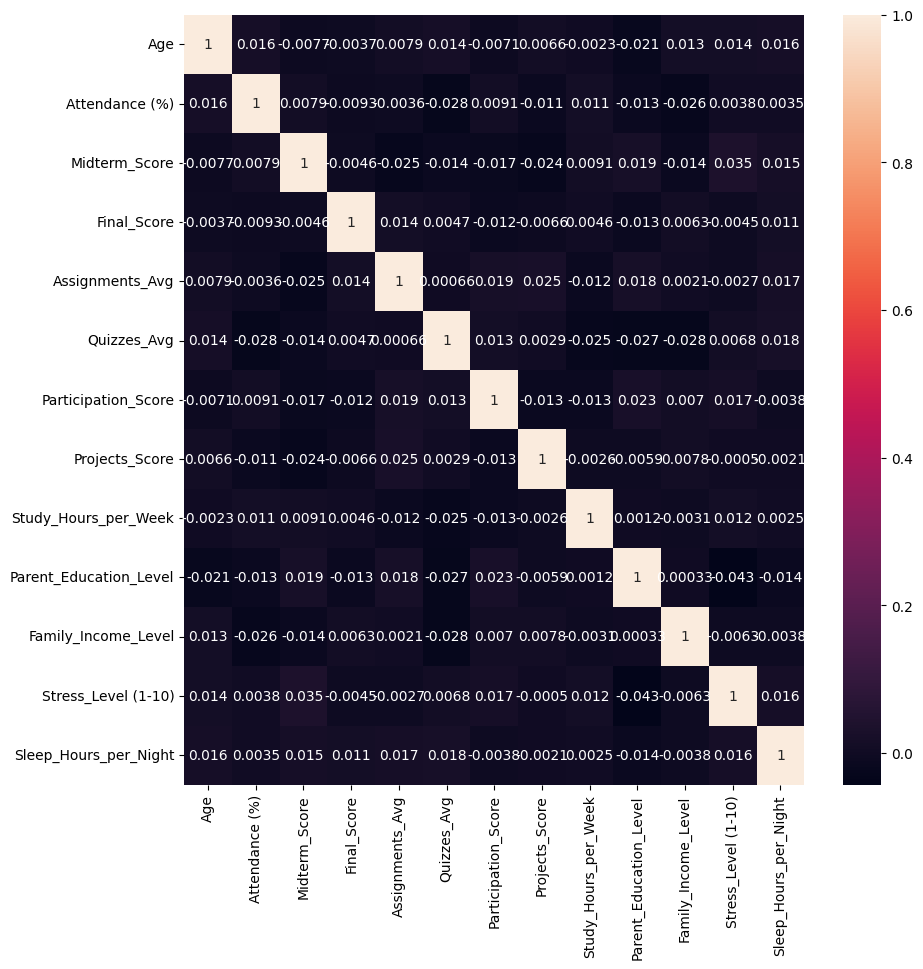

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
numeric_df_processed = df_processed.select_dtypes(include=np.number)
sns.heatmap(numeric_df_processed.corr(),annot=True)
plt.show()

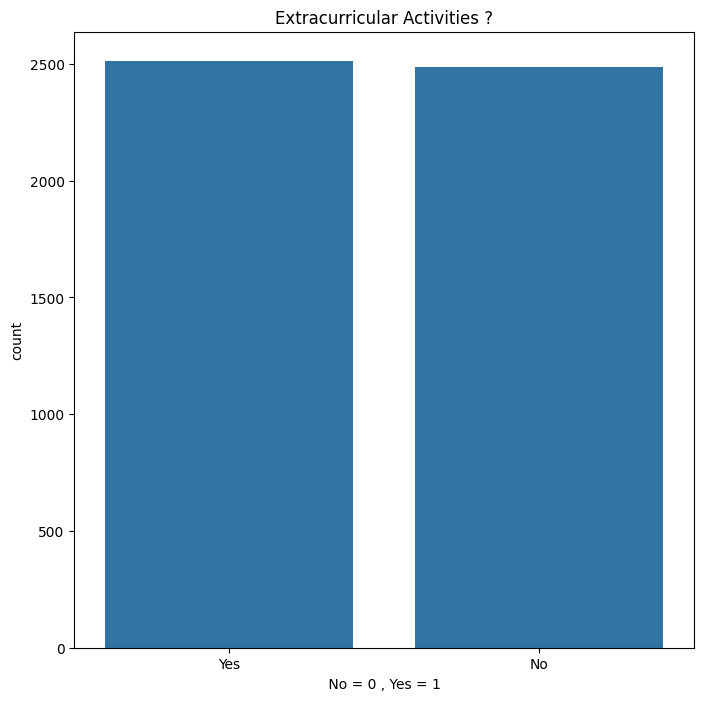

In [50]:
plt.figure(figsize=(8,8))
sns.countplot(x='Extracurricular_Activities',data=df_processed)
plt.title('Extracurricular Activities ?')
plt.xlabel(' No = 0 , Yes = 1 ')
plt.show()

In [51]:
X = df_processed.drop('Grade', axis=1)
y = df_processed['Grade']

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_encoded = le.fit_transform(y)
grade_classes = le.classes_

In [53]:
y_encoded

array([4, 1, 3, ..., 2, 3, 2])

In [54]:
from sklearn.compose import ColumnTransformer

numerical_features = X.select_dtypes(include=np.number).columns.tolist()

In [55]:
numerical_features

['Age',
 'Attendance (%)',
 'Midterm_Score',
 'Final_Score',
 'Assignments_Avg',
 'Quizzes_Avg',
 'Participation_Score',
 'Projects_Score',
 'Study_Hours_per_Week',
 'Parent_Education_Level',
 'Family_Income_Level',
 'Stress_Level (1-10)',
 'Sleep_Hours_per_Night']

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

numerical_features_to_scale = [
    col for col in numerical_features
    if col not in ['Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)'] # Ordinal or 1-10 scale
]

categorical_features = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_to_scale),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

X_processed = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()

X_final = pd.DataFrame(X_processed, columns=feature_names)

In [57]:
X_processed

array([[ 0.47829016,  1.52897651, -1.72599067, ...,  2.        ,
         1.        ,  1.        ],
       [-1.53217709,  1.5532968 , -0.77041852, ...,  0.        ,
         0.        ,  4.        ],
       [ 1.48352378,  1.67906743, -1.65544123, ...,  0.        ,
         0.        ,  9.        ],
       ...,
       [ 1.48352378,  1.01338639, -1.13922578, ...,         nan,
         2.        ,  5.        ],
       [ 0.98090697,  1.64918822, -0.87538233, ...,  3.        ,
         1.        , 10.        ],
       [-0.02432665,  1.04048614,  1.29559042, ...,  3.        ,
         2.        ,  2.        ]])

In [58]:
feature_names

array(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night',
       'Gender_Female', 'Gender_Male', 'Department_Business',
       'Department_CS', 'Department_Engineering',
       'Department_Mathematics', 'Extracurricular_Activities_No',
       'Extracurricular_Activities_Yes', 'Internet_Access_at_Home_No',
       'Internet_Access_at_Home_Yes', 'Parent_Education_Level',
       'Family_Income_Level', 'Stress_Level (1-10)'], dtype=object)

In [59]:
X_final

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Sleep_Hours_per_Night,...,Department_CS,Department_Engineering,Department_Mathematics,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10)
0,0.478290,1.528977,-1.725991,-0.580837,-0.087922,-1.502261,0.808513,-0.821338,-1.004008,-0.424907,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0
1,-1.532177,1.553297,-0.770419,0.260325,-0.050429,1.622045,1.312189,1.612474,1.331819,-1.531400,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
2,1.483524,1.679067,-1.655441,-0.332990,0.756356,-1.722058,-1.561524,1.130388,-0.712029,-0.286595,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0
3,1.483524,1.043960,-1.436910,-1.467594,-0.476039,-0.593952,-1.578773,-1.327493,1.109359,-1.116465,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0
4,0.980907,-1.108038,-1.007878,-0.454575,-0.506589,0.633999,0.494578,0.869746,-0.586896,-1.393088,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.029560,1.440729,-1.424865,-1.398033,-0.057372,0.464124,-1.385582,-1.590199,-1.351601,-1.393088,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,10.0
4996,-1.029560,1.455321,0.457027,-1.293399,-1.184927,0.771285,-0.074645,-1.544123,0.928611,0.474118,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0,4.0
4997,1.483524,1.013386,-1.139226,-0.217250,0.675816,0.515433,-1.464929,1.589092,-1.379408,0.059184,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,2.0,5.0
4998,0.980907,1.649188,-0.875382,-0.707099,0.265481,-1.308812,0.446280,0.684751,-0.420051,-0.424907,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,10.0


In [60]:
X_final.isnull( ).sum()

,0
Age,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0
Quizzes_Avg,0
Participation_Score,0
Projects_Score,0
Study_Hours_per_Week,0
Sleep_Hours_per_Night,0


In [61]:
if X_final.isna().any().any():
    print("Warning: NaNs still present after alignment. Imputing with 0.")
    X_final.fillna(0, inplace=True)

In [62]:
X_final.isnull( ).sum()

,0
Age,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0
Quizzes_Avg,0
Participation_Score,0
Projects_Score,0
Study_Hours_per_Week,0
Sleep_Hours_per_Night,0


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Total number of features after preprocessing: {X_final.shape[1]}")
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Total number of features after preprocessing: 23
Training set size: 3500, Test set size: 1500


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

model_results = {}

 # Logistic Regression (LR)
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
model_results['Logistic Regression'] = accuracy_score(y_test, lr_pred)

# K-Nearest Neighbors (KNN)
k_range = range(1, 21)
knn_scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    knn_scores[k] = accuracy_score(y_test, y_pred_k)

best_k = max(knn_scores, key=knn_scores.get)
best_knn_accuracy = knn_scores[best_k]

model_results['k-Nearest Neighbors (Tuned)'] = best_knn_accuracy

#  Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
model_results['SVM (RBF)'] = accuracy_score(y_test, svm_pred)

# Random Forest Classifier (RF)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
model_results['Random Forest'] = accuracy_score(y_test, rf_pred)

# Naive Bayes Classifier
nb_model =GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
model_results['Naive Bayes'] = accuracy_score(y_test, nb_pred)

# Display initial results
initial_comparison = pd.Series(model_results).sort_values(ascending=False).to_frame(name='Accuracy')
print("\nInitial Model Comparison (Accuracy):\n")
print(initial_comparison.to_markdown(numalign="left", stralign="left"))


Initial Model Comparison (Accuracy):

|                             | Accuracy   |
|:----------------------------|:-----------|
| Logistic Regression         | 0.946667   |
| SVM (RBF)                   | 0.913333   |
| Random Forest               | 0.802667   |
| Naive Bayes                 | 0.795333   |
| k-Nearest Neighbors (Tuned) | 0.712      |


/tmp/ipython-input-2461833642.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Model accuracy bar chart saved as 'model_accuracy_bar_chart.png'


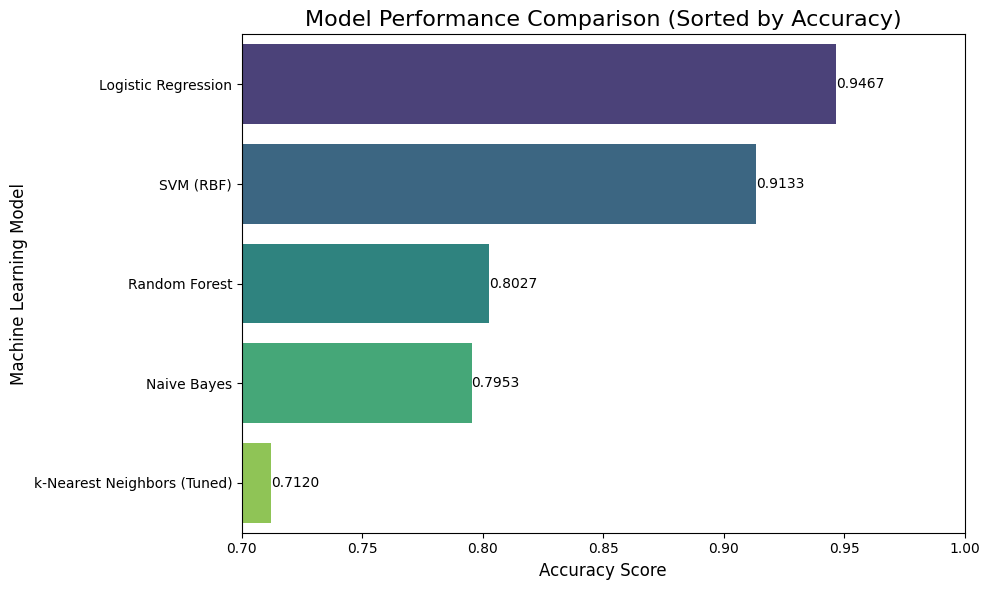

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'SVM (RBF)', 'Random Forest', 'Naive Bayes', 'k-Nearest Neighbors (Tuned)']
accuracies = [0.946667, 0.913333, 0.802667, 0.795333, 0.712]

df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

df_sorted = df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Accuracy',
    y='Model',
    data=df_sorted,
    palette='viridis'
)

plt.title('Model Performance Comparison (Sorted by Accuracy)', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Machine Learning Model', fontsize=12)

for index, row in df_sorted.iterrows():
    plt.text(
        row['Accuracy'],
        index,
        f"{row['Accuracy']:.4f}",
        color='black',
        ha="left",
        va="center",
        fontsize=10
    )
plt.xlim(0.70, 1.0)

plt.tight_layout()
plt.savefig('model_accuracy_bar_chart.png')
print("Model accuracy bar chart saved as 'model_accuracy_bar_chart.png'")

--- Final Classification Report (Logistic Regression) ---

              precision    recall  f1-score   support

           A       0.25      0.40      0.31         5
           B       0.84      0.97      0.90       191
           C       1.00      0.95      0.97       692
           D       0.99      0.94      0.96       528
           F       0.72      1.00      0.84        84

    accuracy                           0.95      1500
   macro avg       0.76      0.85      0.80      1500
weighted avg       0.96      0.95      0.95      1500



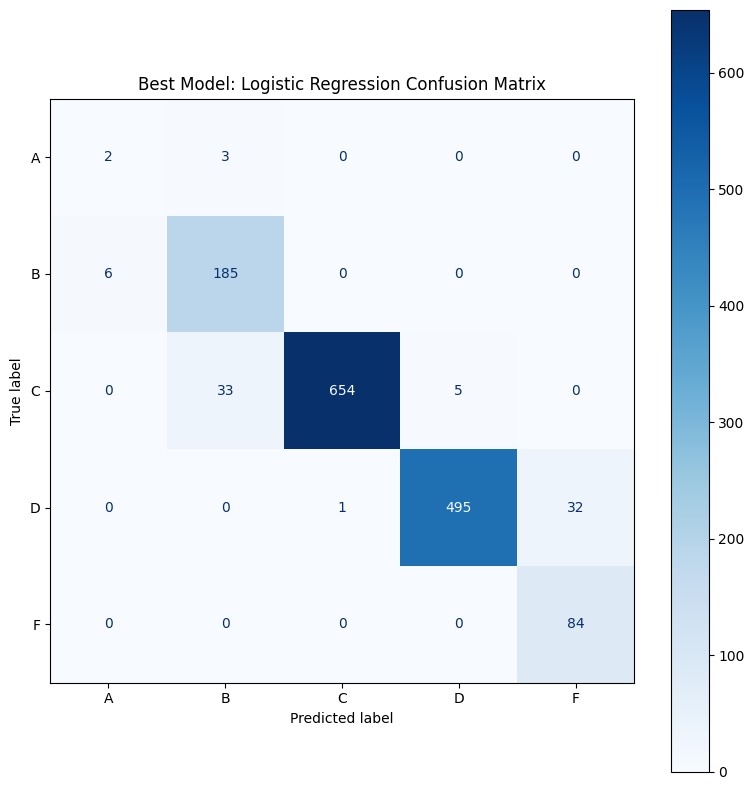


--- Top 10 Feature Coefficients (Avg Absolute Magnitude) ---

|                             | 0        |
|:----------------------------|:---------|
| Final_Score                 | 4.9458   |
| Projects_Score              | 4.93488  |
| Midterm_Score               | 3.07534  |
| Assignments_Avg             | 2.63714  |
| Quizzes_Avg                 | 1.78884  |
| Participation_Score         | 1.78074  |
| Department_Business         | 0.482224 |
| Internet_Access_at_Home_No  | 0.277341 |
| Internet_Access_at_Home_Yes | 0.268788 |
| Department_CS               | 0.222302 |


In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

best_model = lr_model
y_pred_best = best_model.predict(X_test)

# 1. Classification Report
report = classification_report(y_test, y_pred_best, target_names=grade_classes, zero_division=0)
print("--- Final Classification Report (Logistic Regression) ---\n")
print(report)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grade_classes)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Best Model: Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.savefig('logistic_regression_confusion_matrix.png')
plt.show()

# 3. Feature Importance (Coefficients)
coefficients = pd.DataFrame(
    best_model.coef_,
    columns=X_final.columns,
    index=grade_classes
).T
mean_abs_coef = coefficients.abs().mean(axis=1).sort_values(ascending=False)

print("\n--- Top 10 Feature Coefficients (Avg Absolute Magnitude) ---\n")
print(mean_abs_coef.head(10).to_markdown(numalign="left", stralign="left"))